In [141]:
import numpy as np
import matplotlib.pyplot as plt
# from tqdm.auto import trange
import lmfit
# from uncertainties import ufloat
from copy import deepcopy


# Exercício 1

In [2]:
def xor(bool1: bool, bool2: bool) -> bool:
    return bool1 != bool2


def regra_90(N: int = 141, t: int = 70) -> np.ndarray:
    matriz = np.zeros((t, N), dtype=bool)
    matriz[0, N // 2] = True

    for tt in range(t - 1):
        for i in range(1, N - 1):
            matriz[tt + 1, i] = xor(matriz[tt, i - 1], matriz[tt, i + 1])

    matriz = matriz.astype(int)
    return matriz


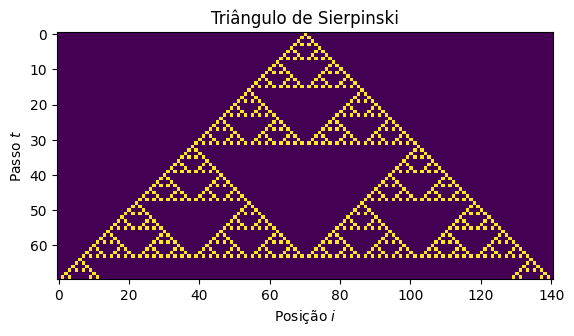

In [65]:
matriz = regra_90()
# print(matriz)

fig1, ax1 = plt.subplots()
# fig1.set_size_inches((20, 20))
ax1.set_title('Triângulo de Sierpinski')
ax1.set_aspect('equal')
ax1.set_xlabel('Posição $i$')
ax1.set_ylabel('Passo $t$')

ax1.imshow(X=matriz)

# fig1.savefig(
#     fname='lista04/fig_1.pdf',
#     dpi=1000
# )


# Exercício 2

In [4]:
def verificar_retangulo(matriz: np.ndarray = matriz, t_i: int = 0, t_f: int = -1, i_i: int = 0, i_f: int = -1) -> bool:
    return 1 in matriz[t_i:t_f, i_i:i_f]


def massa(L: int, matriz: np.ndarray = matriz) -> np.ndarray:
    t, N = np.shape(matriz)
    n_t, n_N = t // L, N // L

    nova_matriz = np.zeros(
        shape=(n_t, n_N),
        dtype=int
    )
    
    for i in np.arange(n_t):
        for j in np.arange(n_N):
            nova_matriz[i, j] = int(1 in matriz[i * L:(i + 1) * L, j * L:(j + 1) * L])
    
    M = np.sum(nova_matriz)

    return M


vmassa = np.vectorize(massa)


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 5
    # variables        = 2
    chi-square         = 0.02565244
    reduced chi-square = 0.00855081
    Akaike info crit   = -22.3627732
    Bayesian info crit = -23.1438973
    R-squared          = 0.99781062
[[Variables]]
    slope:      1.55992048 +/- 0.04218696 (2.70%) (init = 1)
    intercept:  0.78151495 +/- 0.10041648 (12.85%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.911


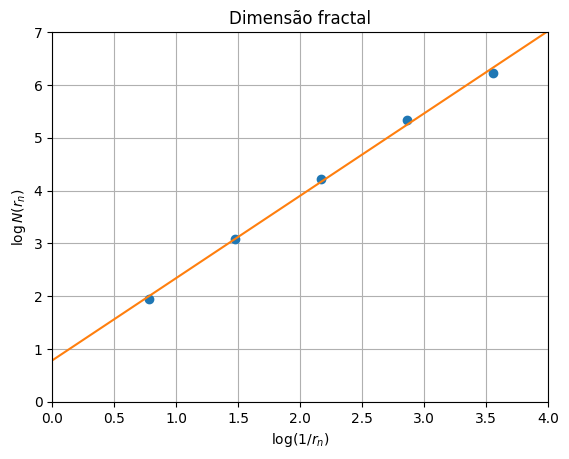

In [35]:
array_L = 2 ** np.arange(1, 6)
array_r = array_L / 70
array_massa = vmassa(array_L)

x2 = np.log(1 / array_r)
y2 = np.log(array_massa)

fig2, ax2 = plt.subplots()
ax2.set_title('Dimensão fractal')
ax2.grid(visible=True)

ax2.set_xlabel('$\log (1 / r_n)$')
ax2.set_xlim(0, 4)

ax2.set_ylabel('$\log N(r_n)$')
ax2.set_ylim(0, 7)

ax2.plot(x2, y2, 'o')

modelo2 = lmfit.models.LinearModel()
fit2 = modelo2.fit(y2, x = x2)

print(fit2.fit_report())

d_f = fit2.params['slope'].value
coef_lin = fit2.params['intercept'].value

x2_fit = np.linspace(0, 4)
y2_fit = d_f * x2_fit + coef_lin
ax2.plot(x2_fit, y2_fit)

# fig2.savefig(
#     fname='lista04/fig_2.pdf',
#     dpi=1000
# )

# Exercício 3

In [155]:
p_c = 0.5927


In [162]:
def array_inicial(L: int) -> np.ndarray:
    if L % 2 == 0:
        L += 1

    formato = (L, L, 3)
    coord_central = L // 2

    array = np.zeros(shape=formato, dtype=int)
    array[coord_central, coord_central, 0] = 1
    array[coord_central, coord_central, 2] = 1

    return array


# def primeiros_vizinhos(array: np.ndarray) -> np.ndarray:
#     posicoes_ocupadas = np.argwhere(array[:, :, 0])
#     novo_array = deepcopy(array)

#     for posicao in posicoes_ocupadas:
#         i, j = posicao
#         if array[i, j - 1, 2] == 0:
#             novo_array[i, j - 1, 1] = 1
#         if array[i, j + 1, 2] == 0:
#             novo_array[i, j + 1, 1] = 1
#         if array[i - 1, j, 2] == 0:
#             novo_array[i - 1, j, 1] = 1
#         if array[i + 1, j, 2] == 0:
#             novo_array[i + 1, j, 1] = 1

#     return novo_array


def primeiros_vizinhos(array: np.ndarray) -> np.ndarray:
    L_x, L_y, L_z = np.shape(array)
    posicoes_ocupadas = np.argwhere(array[:, :, 0])
    novo_array = deepcopy(array)

    for posicao in posicoes_ocupadas:
        i, j = posicao
        if i == 0 and j == 0:
            if novo_array[i + 1, j, 2] == 0:
                novo_array[i + 1, j, 1] = 1
            if novo_array[i, j + 1, 2] == 0:
                novo_array[i, j + 1, 1] = 1
        elif i == 0 and j == L_y - 1:
            if novo_array[i + 1, j, 2] == 0:
                novo_array[i + 1, j, 1] = 1
            if novo_array[i, j - 1, 2] == 0:
                novo_array[i, j - 1, 1] = 1
        elif i == L_x - 1 and j == 0:
            if novo_array[i - 1, j, 2] == 0:
                novo_array[i - 1, j, 1] = 1
            if novo_array[i, j + 1, 2] == 0:
                novo_array[i, j + 1, 1] = 1
        elif i == L_x - 1 and j == L_y - 1:
            if novo_array[i - 1, j, 2] == 0:
                novo_array[i - 1, j, 1] = 1
            if novo_array[i, j - 1, 2] == 0:
                novo_array[i, j - 1, 1] = 1
        elif i == 0:
            if novo_array[i + 1, j, 2] == 0:
                novo_array[i + 1, j, 1] = 1
            if novo_array[i, j - 1, 2] == 0:
                novo_array[i, j - 1, 1] = 1
            if novo_array[i, j + 1, 2] == 0:
                novo_array[i, j + 1, 1] = 1
        elif j == 0:
            if novo_array[i, j + 1, 2] == 0:
                novo_array[i, j + 1, 1] = 1
            if novo_array[i - 1, j, 2] == 0:
                novo_array[i - 1, j, 1] = 1
            if novo_array[i + 1, j, 2] == 0:
                novo_array[i + 1, j, 1] = 1
        elif i == L_x - 1:
            if novo_array[i - 1, j, 2] == 0:
                novo_array[i - 1, j, 1] = 1
            if novo_array[i, j - 1, 2] == 0:
                novo_array[i, j - 1, 1] = 1
            if novo_array[i, j + 1, 2] == 0:
                novo_array[i, j + 1, 1] = 1
        elif j == L_y - 1:
            if novo_array[i, j - 1, 2] == 0:
                novo_array[i, j - 1, 1] = 1
            if novo_array[i - 1, j, 2] == 0:
                novo_array[i - 1, j, 1] = 1
            if novo_array[i + 1, j, 2] == 0:
                novo_array[i + 1, j, 1] = 1
        else:
            if novo_array[i, j - 1, 2] == 0:
                novo_array[i, j - 1, 1] = 1
            if novo_array[i, j + 1, 2] == 0:
                novo_array[i, j + 1, 1] = 1
            if novo_array[i - 1, j, 2] == 0:
                novo_array[i - 1, j, 1] = 1
            if novo_array[i + 1, j, 2] == 0:
                novo_array[i + 1, j, 1] = 1

    return novo_array


def iteracao(array: np.ndarray, p: float = p_c) -> np.ndarray:
    posicoes_perimetro = np.argwhere(array[:, :, 1])
    novo_array = deepcopy(array)

    for posicao in posicoes_perimetro:
        i, j = posicao
        r = np.random.random()
        if r <= p:
            novo_array[i, j, 0] = 1
        novo_array[i, j, 1] = 0
        novo_array[i, j, 2] = 1

    return novo_array


def leath(L: int, p: float = p_c) -> np.ndarray:
    array = array_inicial(L)
    array = primeiros_vizinhos(array)

    formato_final = np.shape(array[:, :, 1])
    array_final = np.zeros(shape=formato_final)

    while np.array_equal(array[:, :, 1], array_final) == False:
        array = iteracao(array, p)
        array = primeiros_vizinhos(array)

    return array


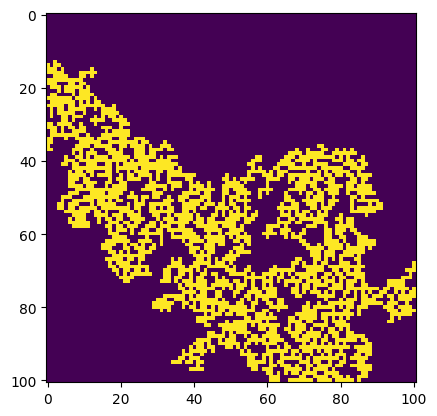

In [165]:
matriz = leath(100)

plt.imshow(matriz[:, :, 0])

In [135]:
# def primeiros_vizinhos(array: np.ndarray):
#     L_x, L_y, L_z = np.shape(array)
#     posicoes = np.argwhere(array[:, :, 0])
    
#     for posicao in posicoes:
#         i, j = posicao
#         if i == 0 and j == 0:
#             if array[i + 1, j, 2] == 0:
#                 array[i + 1, j, 1] = 1
#             elif array[i, j + 1, 2] == 0:
#                 array[i, j + 1, 1] = 1
#         elif i == 0 and j == L_y - 1:
#             if array[i + 1, j, 2] == 0:
#                 array[i + 1, j, 1] = 1
#             elif array[i, j - 1, 2] == 0:
#                 array[i, j - 1, 1] = 1
#         elif i == L_x - 1 and j == 0:
#             if array[i - 1, j, 2] == 0:
#                 array[i - 1, j, 1] = 1
#             elif array[i, j + 1, 2] == 0:
#                 array[i, j + 1, 1] = 1
#         elif i == L_x - 1 and j == L_y - 1:
#             if array[i - 1, j, 2] == 0:
#                 array[i - 1, j, 1] = 1
#             elif array[i, j - 1, 2] == 0:
#                 array[i, j - 1, 1] = 1
#         elif i == 0:
#             if array[i + 1, j, 2] == 0:
#                 array[i + 1, j, 1] = 1
#             elif array[i, j - 1, 2] == 0:
#                 array[i, j - 1, 1] = 1
#             elif array[i, j + 1, 2] == 0:
#                 array[i, j + 1, 1] = 1
#         elif j == 0:
#             if array[i, j + 1, 2] == 0:
#                 array[i, j + 1, 1] = 1
#             elif array[i - 1, j, 2] == 0:
#                 array[i - 1, j, 1] = 1
#             elif array[i + 1, j, 2] == 0:
#                 array[i + 1, j, 1] = 1
#         elif i == L_x - 1:
#             if array[i - 1, j, 2] == 0:
#                 array[i - 1, j, 1] = 1
#             elif array[i, j - 1, 2] == 0:
#                 array[i, j - 1, 1] = 1
#             elif array[i, j + 1, 2] == 0:
#                 array[i, j + 1, 1] = 1
#         elif j == L_y - 1:
#             if array[i, j - 1, 2] == 0:
#                 array[i, j - 1, 1] = 1
#             elif array[i - 1, j, 2] == 0:
#                 array[i - 1, j, 1] = 1
#             elif array[i + 1, j, 2] == 0:
#                 array[i + 1, j, 1] = 1
#         else:
#             if array[i, j - 1, 2] == 0:
#                 array[i, j - 1, 1] = 1
#             elif array[i, j + 1, 2] == 0:
#                 array[i, j + 1, 1] = 1
#             elif array[i - 1, j, 2] == 0:
#                 array[i - 1, j, 1] = 1
#             elif array[i + 1, j, 2] == 0:
#                 array[i + 1, j, 1] = 1
    
#     return array


In [154]:
L = 11
array = array_inicial(L)
# print(array[:, :, 0])
print(array[:, :, 1])
# print(array[:, :, 2])

array = primeiros_vizinhos(array)
print(array[:, :, 1])


[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [118]:
indices = np.argwhere(array[:, :, 1])
print(indices)
for elemento in indices:
    print(elemento)
# a, b = indices[1]

[[4 5]
 [5 4]
 [5 6]
 [6 5]]
[4 5]
[5 4]
[5 6]
[6 5]


In [115]:
b

4

In [44]:
np.arange(10) % 2

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [85]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print(A)
print(B)
print(A * B)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[[ 5 12]
 [21 32]]
